# Running LazyPredict subsetting for Top features identified via XGBoost & SHAP analysis


In [6]:
# !pip install --force-reinstall 'numpy<2'
# !pip install h2o==3.46.0.6
!java -version

java version "1.8.0_431"
Java(TM) SE Runtime Environment (build 1.8.0_431-b10)
Java HotSpot(TM) 64-Bit Server VM (build 25.431-b10, mixed mode)


In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='12G')
print(h2o.__version__)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_431"; Java(TM) SE Runtime Environment (build 1.8.0_431-b10); Java HotSpot(TM) 64-Bit Server VM (build 25.431-b10, mixed mode)
  Starting server from /Users/masaver/Desktop/masaver/data_science_projects/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/p8/8wyrdyt14zvb95xl0qh7mcq00000gn/T/tmplq8uchnw
  JVM stdout: /var/folders/p8/8wyrdyt14zvb95xl0qh7mcq00000gn/T/tmplq8uchnw/h2o_masaver_started_from_python.out
  JVM stderr: /var/folders/p8/8wyrdyt14zvb95xl0qh7mcq00000gn/T/tmplq8uchnw/h2o_masaver_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_masaver_zwfdu6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,10.65 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


3.46.0.6


In [2]:
%%time
import os
import warnings
warnings.filterwarnings('ignore')
data_file = os.path.join('..', '..', 'data', 'raw', 'train.csv')
train = h2o.import_file(data_file)
train.head()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 111 ms, sys: 50 ms, total: 161 ms
Wall time: 7.35 s


id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,bg-5:05,bg-5:00,bg-4:55,bg-4:50,bg-4:45,bg-4:40,bg-4:35,bg-4:30,bg-4:25,bg-4:20,bg-4:15,bg-4:10,bg-4:05,bg-4:00,bg-3:55,bg-3:50,bg-3:45,bg-3:40,bg-3:35,bg-3:30,bg-3:25,bg-3:20,bg-3:15,bg-3:10,bg-3:05,bg-3:00,bg-2:55,bg-2:50,bg-2:45,bg-2:40,bg-2:35,bg-2:30,bg-2:25,bg-2:20,bg-2:15,bg-2:10,bg-2:05,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,bg-1:10,bg-1:05,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00,insulin-5:55,insulin-5:50,insulin-5:45,insulin-5:40,insulin-5:35,insulin-5:30,insulin-5:25,insulin-5:20,insulin-5:15,insulin-5:10,insulin-5:05,insulin-5:00,insulin-4:55,insulin-4:50,insulin-4:45,insulin-4:40,insulin-4:35,insulin-4:30,insulin-4:25,insulin-4:20,insulin-4:15,insulin-4:10,insulin-4:05,insulin-4:00,insulin-3:55,insulin-3:50,insulin-3:45,insulin-3:40,insulin-3:35,insulin-3:30,insulin-3:25,insulin-3:20,insulin-3:15,insulin-3:10,insulin-3:05,insulin-3:00,insulin-2:55,insulin-2:50,insulin-2:45,insulin-2:40,insulin-2:35,insulin-2:30,insulin-2:25,insulin-2:20,insulin-2:15,insulin-2:10,insulin-2:05,insulin-2:00,insulin-1:55,insulin-1:50,insulin-1:45,insulin-1:40,insulin-1:35,insulin-1:30,insulin-1:25,insulin-1:20,insulin-1:15,insulin-1:10,insulin-1:05,insulin-1:00,insulin-0:55,insulin-0:50,insulin-0:45,insulin-0:40,insulin-0:35,insulin-0:30,insulin-0:25,insulin-0:20,insulin-0:15,insulin-0:10,insulin-0:05,insulin-0:00,carbs-5:55,carbs-5:50,carbs-5:45,carbs-5:40,carbs-5:35,carbs-5:30,carbs-5:25,carbs-5:20,carbs-5:15,carbs-5:10,carbs-5:05,carbs-5:00,carbs-4:55,carbs-4:50,carbs-4:45,carbs-4:40,carbs-4:35,carbs-4:30,carbs-4:25,carbs-4:20,carbs-4:15,carbs-4:10,carbs-4:05,carbs-4:00,carbs-3:55,carbs-3:50,carbs-3:45,carbs-3:40,carbs-3:35,carbs-3:30,carbs-3:25,carbs-3:20,carbs-3:15,carbs-3:10,carbs-3:05,carbs-3:00,carbs-2:55,carbs-2:50,carbs-2:45,carbs-2:40,carbs-2:35,carbs-2:30,carbs-2:25,carbs-2:20,carbs-2:15,carbs-2:10,carbs-2:05,carbs-2:00,carbs-1:55,carbs-1:50,carbs-1:45,carbs-1:40,carbs-1:35
p01_0,p01,1970-01-01 06:10:00,nan,nan,9.6,nan,nan,9.7,nan,nan,9.2,nan,nan,8.7,nan,nan,8.4,nan,nan,8.1,nan,nan,8.3,nan,nan,9.6,nan,nan,11.1,nan,nan,11.8,nan,nan,12.8,nan,nan,13.9,nan,nan,14.2,nan,nan,14.2,nan,nan,15.4,nan,nan,17.2,nan,nan,18.2,nan,nan,18.4,nan,nan,18,nan,nan,17.3,nan,nan,17.5,nan,nan,17.3,nan,nan,16.2,nan,nan,15.1,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0417,0.0417,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
p01_1,p01,1970-01-01 06:25:00,nan,nan,9.7,nan,nan,9.2,nan,nan,8.7,nan,nan,8.4,nan,nan,8.1,nan,nan,8.3,nan,nan,9.6,nan,nan,11.1,nan,nan,11.8,nan,nan,12.8,nan,nan,13.9,nan,nan,14.2,nan,nan,14.2,nan,nan,15.4,nan,nan,17.2,nan,nan,18.2,nan,nan,18.4,nan,nan,18,nan,nan,17.3,nan,nan,17.5,nan,nan,17.3,nan,nan,16.2,nan,nan,15.1,nan,nan,14.4,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0417,0.0417,0.0417,0.0417,0.0417,nan,na

In [3]:
%%time
# Define features and target variable
x = train.columns[1:]
y = 'bg+1:00'


CPU times: user 27 μs, sys: 25 μs, total: 52 μs
Wall time: 63.9 μs


In [4]:
%%time
aml = H2OAutoML( max_models = 500 , seed = 1000 , max_runtime_secs = 3600 )
aml.train( x = x , y = y , training_frame = train )

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 13 s, sys: 14.7 s, total: 27.8 s
Wall time: 1h 8s


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,1025.0,1025.0,2566275.0,12.0,15.0,14.997073,20.0,716.0,195.2839
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2024-11-10 17:22:36,0.087 sec,0.0,2.9949534,2.3405030,8.9697458,3.0266364,2.3625254,9.1605281
,2024-11-10 17:22:55,18.283 sec,5.0,2.3385664,1.8172737,5.4688927,2.3946207,1.8580381,5.7342082
,2024-11-10 17:23:05,28.388 sec,10.0,2.0113312,1.5395328,4.0454533,2.0995840,1.6018042,4.4082530
,2024-11-10 17:23:17,40.810 sec,15.0,1.8322738,1.3790491,3.3572274,1.9528382,1.4630065,3.8135770
,2024-11-10 17:23:32,55.296 sec,20.0,1.7369534,1.2928083,3.0170071,1.8859416,1.3963958,3.5567758
,2024-11-10 17:23:44,1 min 7.976 sec,25.0,1.6702830,1.2342797,2.7898452,1.8429713,1.3544888,3.3965432
,2024-11-10 17:23:57,1 min 20.567 sec,30.0,1.6250288,1.1967681,2.6407185,1.8166023,1.3301324,3.3000438
,2024-11-10 17:24:06,1 min 29.591 sec,35.0,1.5893697,1.1695382,2.5260961,1.7977164,1.3140557,3.2317842


In [7]:
%%time

# View the AutoML Leaderboard
lb = aml.leaderboard
lb

CPU times: user 18 μs, sys: 85 μs, total: 103 μs
Wall time: 121 μs


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_1_AutoML_1_20241110_165931,1.39269,1.93958,0.99558,0.153088,1.93958
XGBoost_1_AutoML_1_20241110_165931,1.68348,2.83411,1.21419,0.184707,2.83411
GLM_1_AutoML_1_20241110_165931,2.05957,4.24181,1.52801,0.223603,4.24181


In [12]:
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_1_AutoML_1_20241110_134201,1.38306,1.91285,0.987241,0.152087,1.91285
XGBoost_1_AutoML_1_20241110_134201,1.68348,2.83411,1.21419,0.184707,2.83411
XGBoost_2_AutoML_1_20241110_134201,1.84734,3.41266,1.35722,0.20015,3.41266
GLM_1_AutoML_1_20241110_134201,2.05957,4.24181,1.52801,0.223603,4.24181


In [9]:
aml.get_leaderboard()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_1_AutoML_1_20241110_165931,1.39269,1.93958,0.99558,0.153088,1.93958
XGBoost_1_AutoML_1_20241110_165931,1.68348,2.83411,1.21419,0.184707,2.83411
GLM_1_AutoML_1_20241110_165931,2.05957,4.24181,1.52801,0.223603,4.24181


In [10]:
leader_model = aml.leader

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
RMSE: 0.841054882787109
R2: 0.9212134597471514


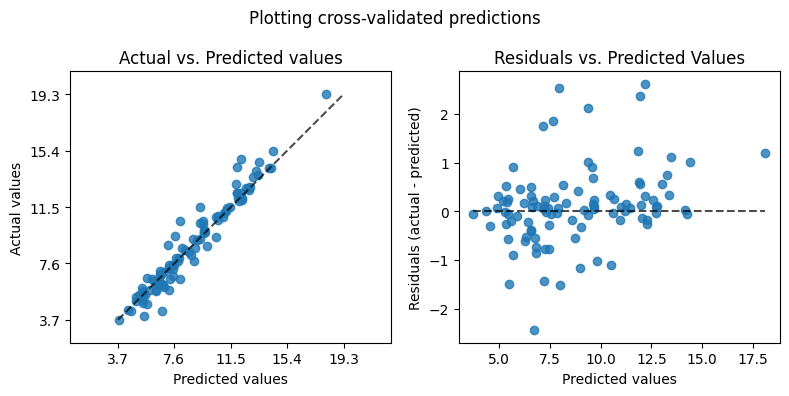

In [11]:
from sklearn.metrics import root_mean_squared_error, r2_score, PredictionErrorDisplay
import matplotlib.pyplot as plt

y_train = train[y].as_data_frame().values
y_pred = aml.leader.predict(train).as_data_frame().values

print(f'RMSE: {root_mean_squared_error(y_true=y_train, y_pred=y_pred)}')
print(f'R2: {r2_score(y_true=y_train, y_pred=y_pred)}')

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show();

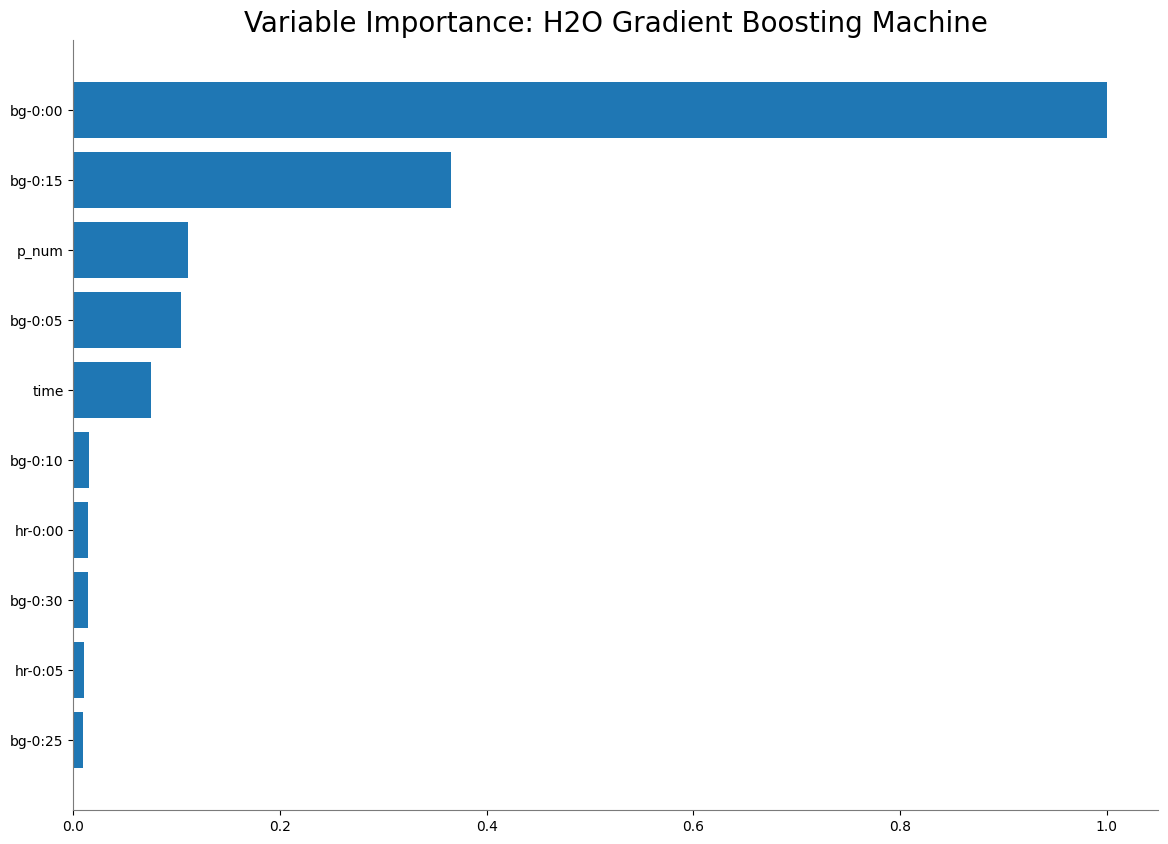

<Figure size 640x480 with 0 Axes>

In [12]:
aml.leader.varimp_plot()

In [19]:
shap_values = aml.leader.shap_values(train)
explainer = shap.Explainer( xgb_model )
shap_values = explainer( Xs )

AttributeError: type object 'ModelBase' has no attribute 'shap_values'

In [21]:
x

['p_num',
 'time',
 'bg-5:55',
 'bg-5:50',
 'bg-5:45',
 'bg-5:40',
 'bg-5:35',
 'bg-5:30',
 'bg-5:25',
 'bg-5:20',
 'bg-5:15',
 'bg-5:10',
 'bg-5:05',
 'bg-5:00',
 'bg-4:55',
 'bg-4:50',
 'bg-4:45',
 'bg-4:40',
 'bg-4:35',
 'bg-4:30',
 'bg-4:25',
 'bg-4:20',
 'bg-4:15',
 'bg-4:10',
 'bg-4:05',
 'bg-4:00',
 'bg-3:55',
 'bg-3:50',
 'bg-3:45',
 'bg-3:40',
 'bg-3:35',
 'bg-3:30',
 'bg-3:25',
 'bg-3:20',
 'bg-3:15',
 'bg-3:10',
 'bg-3:05',
 'bg-3:00',
 'bg-2:55',
 'bg-2:50',
 'bg-2:45',
 'bg-2:40',
 'bg-2:35',
 'bg-2:30',
 'bg-2:25',
 'bg-2:20',
 'bg-2:15',
 'bg-2:10',
 'bg-2:05',
 'bg-2:00',
 'bg-1:55',
 'bg-1:50',
 'bg-1:45',
 'bg-1:40',
 'bg-1:35',
 'bg-1:30',
 'bg-1:25',
 'bg-1:20',
 'bg-1:15',
 'bg-1:10',
 'bg-1:05',
 'bg-1:00',
 'bg-0:55',
 'bg-0:50',
 'bg-0:45',
 'bg-0:40',
 'bg-0:35',
 'bg-0:30',
 'bg-0:25',
 'bg-0:20',
 'bg-0:15',
 'bg-0:10',
 'bg-0:05',
 'bg-0:00',
 'insulin-5:55',
 'insulin-5:50',
 'insulin-5:45',
 'insulin-5:40',
 'insulin-5:35',
 'insulin-5:30',
 'insulin-5:25'